In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set high-quality visualization style
sns.set_theme(style="whitegrid", palette="deep")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
file_path = 'C:\\Users\\SC\\Desktop\\WINHMS Data Mining\\Data\\Room Type Dec.xls'
# Manually defining columns based on the file structure
cols = ['Empty', 'Room_Type', 'Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
df_room = pd.read_excel(file_path, skiprows=4, names=cols)

print("Libraries imported and data loaded.")

Libraries imported and data loaded.


In [3]:
# 1. Basic Cleaning: Remove empty columns and rows
df_room = df_room.drop(columns=['Empty']).dropna(subset=['Room_Type'])

# 2. Filter out non-room categories (like 'PAY MASTER' or 'Total')
# 'PAY MASTER' is usually a dummy account for adjustments
df_room = df_room[~df_room['Room_Type'].str.contains('Total|PAY MASTER', case=False, na=False)]

# 3. Convert numeric columns for analysis
numeric_cols = ['Nights', 'Occupancy_Pct', 'Pax', 'Room_Revenue', 'Revenue_Pct', 'ARR', 'ARP']
for col in numeric_cols:
    df_room[col] = pd.to_numeric(df_room[col], errors='coerce').fillna(0)

# Filter for active room types
df_active = df_room[df_room['Nights'] > 0].copy()

print(f"Cleaned {len(df_active)} room types for analysis.")
df_active.head()

Cleaned 4 room types for analysis.


,Room_Type,Nights,Occupancy_Pct,Pax,Room_Revenue,Revenue_Pct,ARR,ARP
0,Deluxe Suite,1158.0,49.91,1553.0,3491790.73,44.85,3015.36,2248.42
1,Deluxe Suite Twin Bed,355.0,15.30,508.0,1050887.45,13.50,2960.25,2068.68
2,Executive Suite,182.0,7.84,390.0,840015.62,10.79,4615.47,2153.89
4,Premium Suite,625.0,26.94,739.0,2364082.02,30.36,3782.53,3199.03


C:\Users\SC\AppData\Local\Temp\ipykernel_9448\2966178582.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_rev, x='Room_Revenue', y='Room_Type', palette='crest')


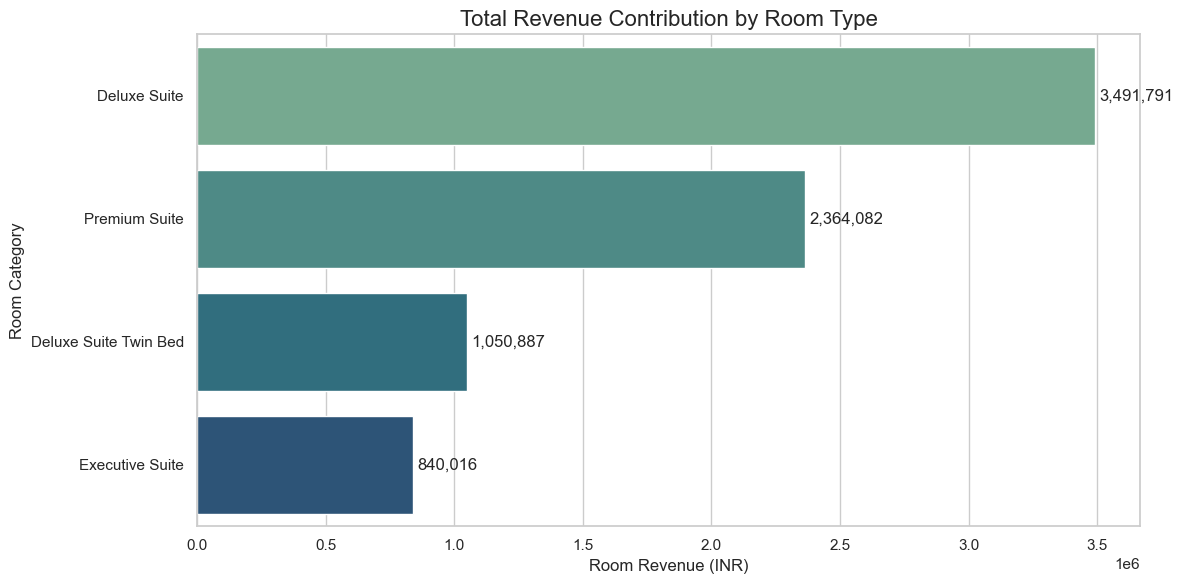

In [4]:
# Sort by Room Revenue
df_rev = df_active.sort_values(by='Room_Revenue', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_rev, x='Room_Revenue', y='Room_Type', palette='crest')
plt.title('Total Revenue Contribution by Room Type', fontsize=16)
plt.xlabel('Room Revenue (INR)', fontsize=12)
plt.ylabel('Room Category', fontsize=12)

# Adding value labels on bars
for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. CORE REVENUE PRODUCT: The 'Deluxe Suite' is the clear revenue leader, contributing nearly 45% of total income.
#### 2. PREMIUM PERFORMANCE: The 'Premium Suite' holds a strong second place, showing that the market has a healthy appetite for upgraded room categories.
#### 3. STRATEGIC MIX: While 'Executive Suites' contribute less in total, they play a vital role in providing variety for top-tier corporate clients.

C:\Users\SC\AppData\Local\Temp\ipykernel_9448\3649046041.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_nights, x='Nights', y='Room_Type', palette='magma')


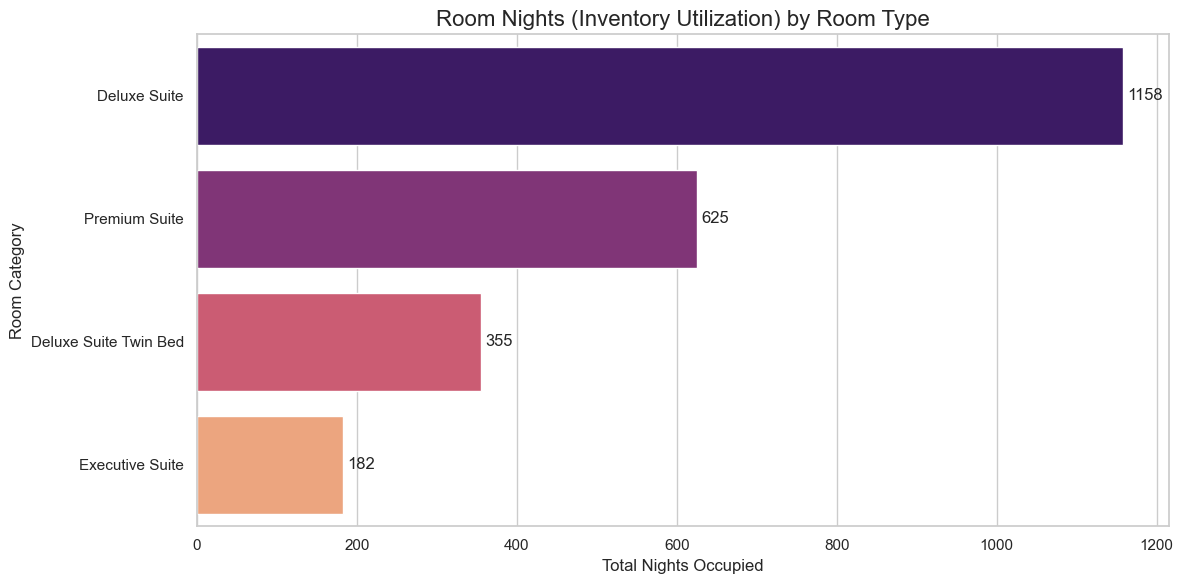

In [5]:
# Sort by Nights
df_nights = df_active.sort_values(by='Nights', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_nights, x='Nights', y='Room_Type', palette='magma')
plt.title('Room Nights (Inventory Utilization) by Room Type', fontsize=16)
plt.xlabel('Total Nights Occupied', fontsize=12)
plt.ylabel('Room Category', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. VOLUME ANCHOR: 'Deluxe Suite' accounts for the highest inventory usage (1158 nights), representing roughly 50% of the hotel's total occupied nights.
#### 2. INVENTORY BALANCE: 'Premium Suites' also show high usage (625 nights), indicating that this room type is not just "luxury" but a high-volume product.
#### 3. LOWEST UTILIZATION: 'Executive Suites' have the lowest nights, which might suggest they are kept for specific high-value bookings or have a smaller total inventory count.

C:\Users\SC\AppData\Local\Temp\ipykernel_9448\4086460012.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_arr, x='ARR', y='Room_Type', palette='viridis')


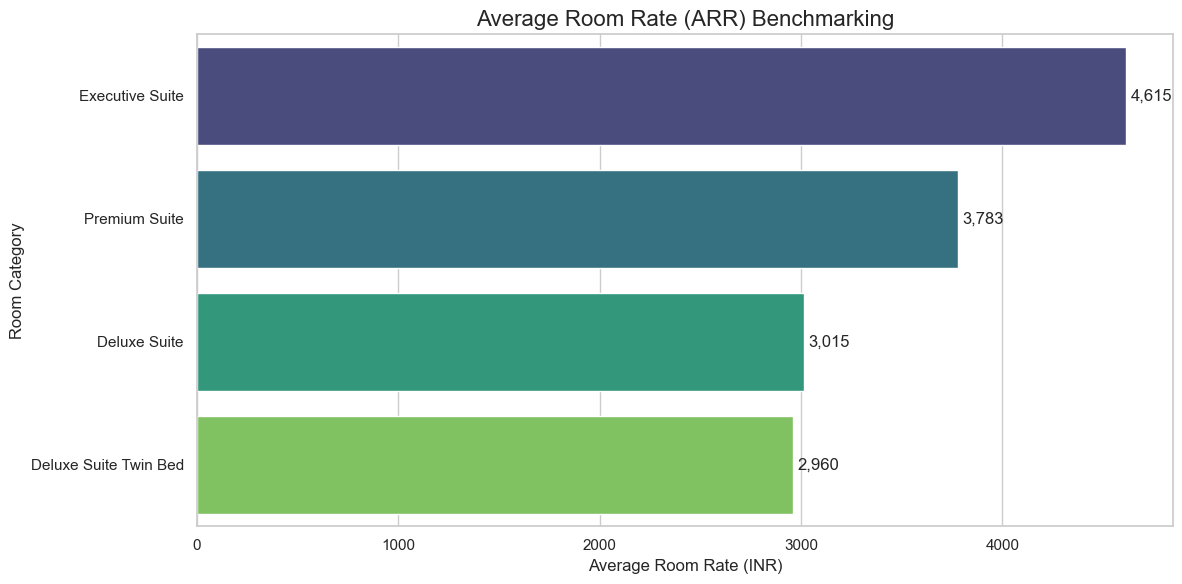

In [6]:
# Sort by ARR
df_arr = df_active.sort_values(by='ARR', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_arr, x='ARR', y='Room_Type', palette='viridis')
plt.title('Average Room Rate (ARR) Benchmarking', fontsize=16)
plt.xlabel('Average Room Rate (INR)', fontsize=12)
plt.ylabel('Room Category', fontsize=12)

for i in ax.containers:
    ax.bar_label(i, fmt='{:,.0f}', padding=3)

plt.tight_layout()
plt.show()

#### --- INSIGHTS ---
#### 1. HIGHEST YIELD: 'Executive Suite' commands the highest ARR (~4,615 INR), justifying its position as a premium tier.
#### 2. CONSISTENT PRICING: There is a clear step-up in pricing from Deluxe (~3,000 INR) to Premium (~3,780 INR) to Executive (~4,600 INR).
#### 3. OPTIMIZATION OPPORTUNITY: Since Deluxe Suites have high volume but lower ARR, even a small increase in the Deluxe rate could significantly boost total revenue due to the high number of nights.

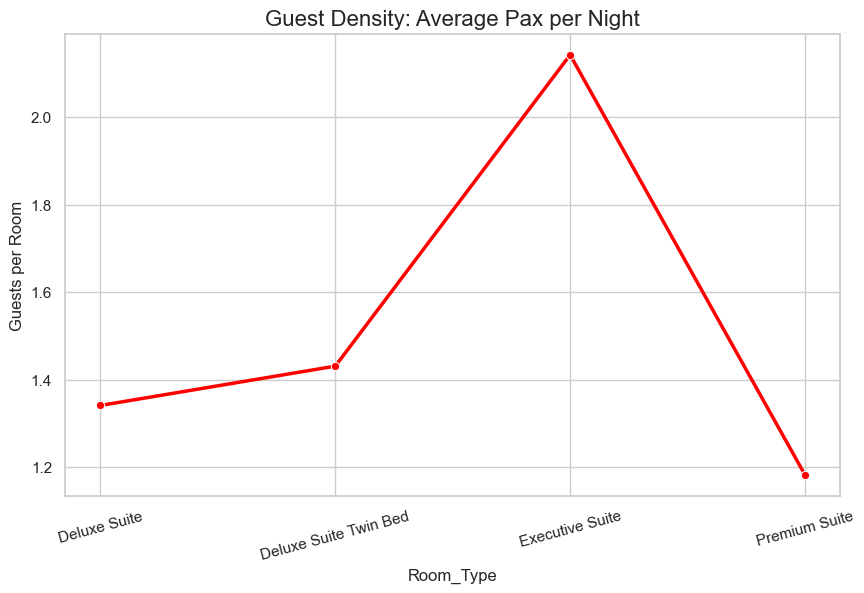

In [7]:
# Calculate Pax per Night to see room occupancy density
df_active['Pax_Per_Night'] = df_active['Pax'] / df_active['Nights']

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_active, x='Room_Type', y='Pax_Per_Night', marker='o', color='red', linewidth=2.5)
plt.title('Guest Density: Average Pax per Night', fontsize=16)
plt.ylabel('Guests per Room', fontsize=12)
plt.xticks(rotation=15)
plt.show()

#### --- INSIGHTS ---
#### 1. OPERATIONAL LOAD: 'Executive Suites' show a higher guest density (Pax per night), likely used by families or groups.
#### 2. STANDARD USE: Deluxe and Premium suites hover around a standard density, suggesting more single/double occupancy corporate or solo travelers.

In [8]:
# Export results
summary = df_active[['Room_Type', 'Nights', 'Room_Revenue', 'ARR', 'Revenue_Pct']].sort_values(by='Room_Revenue', ascending=False)
summary.to_csv('Room_Type_Insights.csv', index=False)

print("Analysis Complete. Key Business Summary:")
summary.head()

Analysis Complete. Key Business Summary:


,Room_Type,Nights,Room_Revenue,ARR,Revenue_Pct
0,Deluxe Suite,1158.0,3491790.73,3015.36,44.85
4,Premium Suite,625.0,2364082.02,3782.53,30.36
1,Deluxe Suite Twin Bed,355.0,1050887.45,2960.25,13.50
2,Executive Suite,182.0,840015.62,4615.47,10.79


#### Summary of Key Business Findings:
#### 1. The Deluxe Dependency: Your business is heavily anchored by the Deluxe Suite, which drives both the majority of your volume (Nights) and revenue (~45%). Ensuring these rooms are always in top condition is priority #1.

#### 2. Executive Suite Strategy: The Executive Suite has the best "Yield" (highest ARR). While it has lower occupancy, it is your most profitable room on a "per-night" basis. Marketing this to premium corporate travelers could improve the overall hotel ARR.

#### 3. Premium Suite Sweet Spot: The Premium Suite is in the "sweet spot"—it has high volume (625 nights) and a significantly higher ARR than the Deluxe category. This is a very successful product for the hotel.

#### 4. Pricing Ladder: Your pricing strategy (Deluxe < Premium < Executive) is logically structured and being followed in practice, as shown by the ascending ARR chart.